### Importing

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
import warnings
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
warnings.filterwarnings('ignore')

In [2]:
df1 = loading_dataset('../data/benin-malanville.csv')
df2 = loading_dataset('../data/sierraleone-bumbuna.csv')
df3 = loading_dataset('../data/togo-dapaong_qc.csv')

df = pd.concat([df1, df2, df3])
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576800 entries, 2021-08-09 00:01:00 to 2022-10-25 00:00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   GHI            1576800 non-null  float64
 1   DNI            1576800 non-null  float64
 2   DHI            1576800 non-null  float64
 3   ModA           1576800 non-null  float64
 4   ModB           1576800 non-null  float64
 5   Tamb           1576800 non-null  float64
 6   RH             1576800 non-null  float64
 7   WS             1576800 non-null  float64
 8   WSgust         1576800 non-null  float64
 9   WSstdev        1576800 non-null  float64
 10  WD             1576800 non-null  float64
 11  WDstdev        1576800 non-null  float64
 12  BP             1576800 non-null  int64  
 13  Cleaning       1576800 non-null  int64  
 14  Precipitation  1576800 non-null  float64
 15  TModA          1576800 non-null  float64
 16  TModB          157680

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
Timestamp,,,,,,,,,,,,,,,,,,,
2021-12-24 23:07:00,-3.5,0.0,0.0,0.0,0.0,23.6,26.1,2.2,2.4,0.4,62.3,4.3,976,0,0.0,22.2,21.8,NaN,Togo
2022-06-18 08:47:00,233.0,0.8,231.6,212.4,212.2,24.2,91.7,0.2,0.7,0.4,153.9,1.8,998,0,0.0,34.2,30.5,NaN,Benin
2022-05-28 18:48:00,4.3,-0.2,4.0,5.3,5.0,27.1,79.4,0.7,2.1,0.7,44.6,7.7,998,0,0.0,27.6,27.9,NaN,Sierraleone
2022-08-02 08:46:00,133.3,0.5,132.3,126.4,125.8,23.6,90.9,2.5,3.4,0.6,265.1,11.3,979,0,0.0,28.3,29.2,NaN,Togo
2022-03-01 05:42:00,-10.3,-0.3,-11.0,0.0,0.0,23.2,85.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,22.9,23.3,NaN,Sierraleone


### Summary statistics

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


In [4]:
#plt.figure(figsize=(14,35))
#for i, col in enumerate(df.select_dtypes("number").columns,1):
    #plt.subplot(9,2,i)
    #sns.histplot(df[col])

This picture caracterize the distribution for each quantitave variable. We notice a big variation within variables and no one of distributions is gaussian.

### Checking of missing values / outliers / incorrect entries

In [5]:
l1 = ['GHI', 'DNI','DHI']
l2 = ['ModA', 'ModB','WS', 'WSgust']

In [6]:
# Checking of missing values / outliers / incorrect entries for elements of l1

# Missing values
for col in l1:
    print(missing_values(df,col)[0])

# No missing values for these columns

0
0
0


In [7]:
# Outliers
for col in l1:
    print(col,len(outliers(df, col))) # It displays the number of outliers for the column

GHI 7589
DNI 175340
DHI 20621


In [8]:
# Negative values
for col in l1:
    print(col,len(neg_values(df, col)))

GHI 777367
DNI 542339
DHI 522310


By above checking, we notice that columns 'GHI', 'DNI','DHI' contains outliers values and incorrect entries.

In [9]:
# Checking of outliers
for col in l2:
    print(col,len(outliers(df, col)))

ModA 7841
ModB 10119
WS 15501
WSgust 30004


We notice that columns 'ModA', 'ModB','WS', 'WSgust' contains outliers values.

### Visualization

#### Time Series Analysis

In [10]:
l3 = ['GHI', 'DNI', 'DHI', 'Tamb']
l4 = list(df['Country'].unique())
l5 = ['2021','2022']

In [11]:
l5 = ['2021','2022']

In [12]:
#ben = df[df['Country']=='Benin'].agg(['mean', 'min', 'max'])
#sie = df[df['Country']=='Sierraleone'].agg(['mean', 'min', 'max'])
#tog = df[df['Country']=='Togo'].agg(['mean', 'min', 'max'])

#df['GHI'][df['Country']=='Benin']
#df['GHI'].resample('M').max().plot()

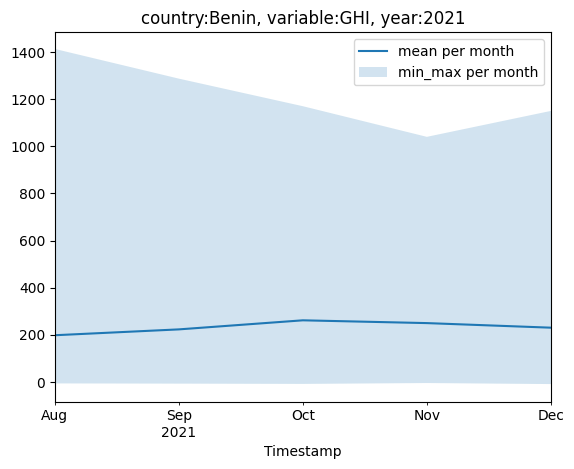

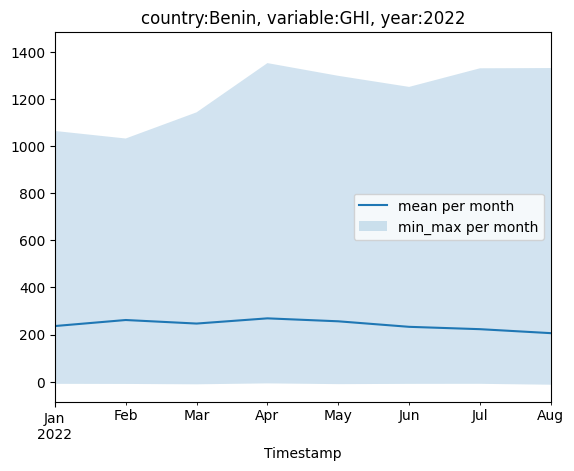

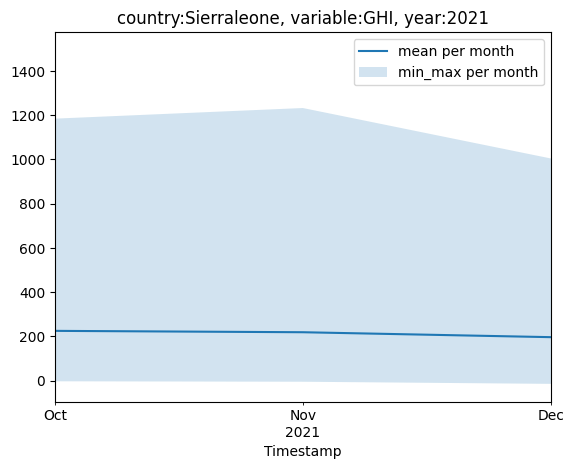

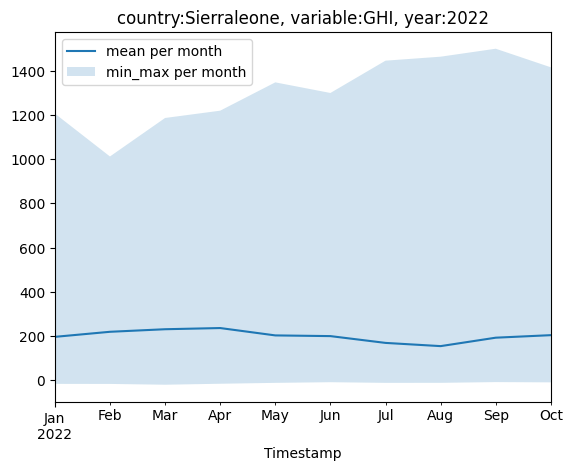

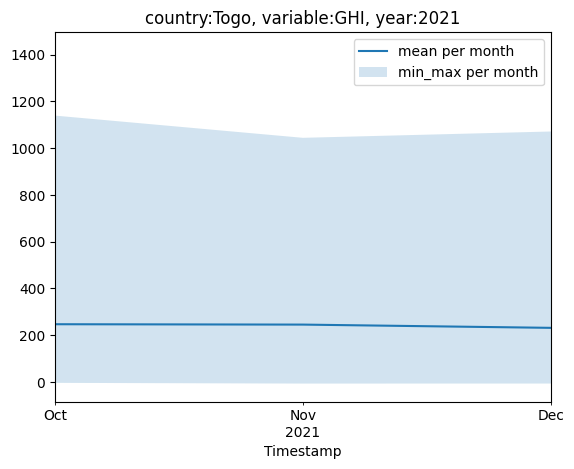

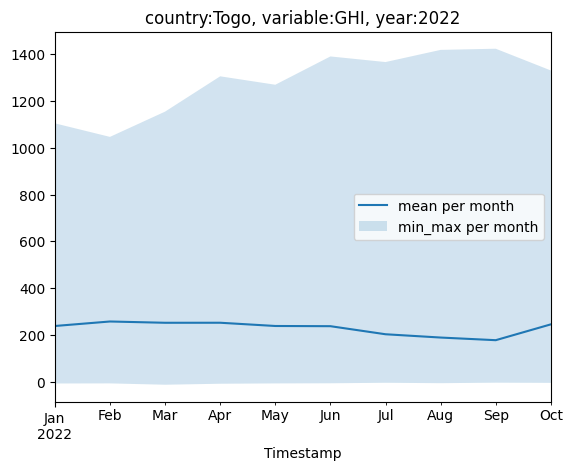

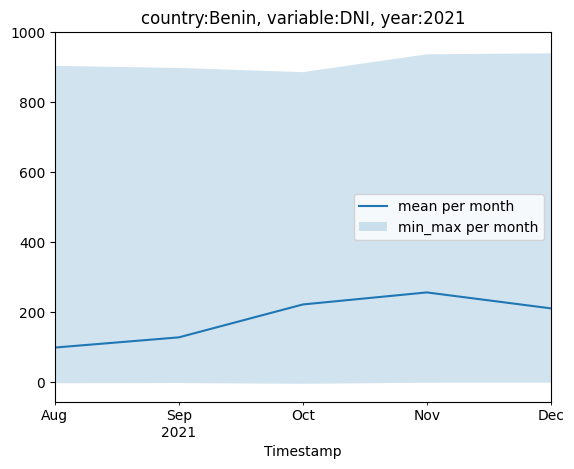

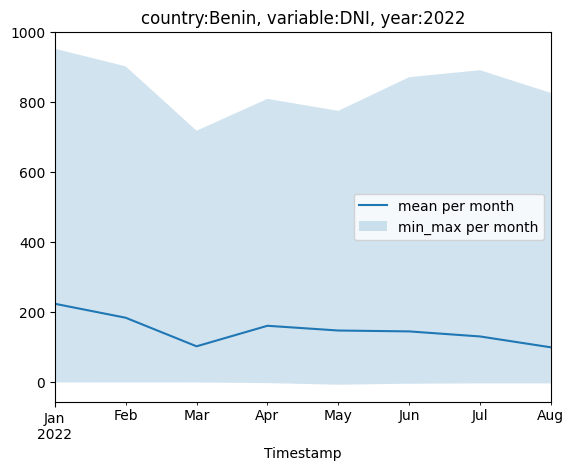

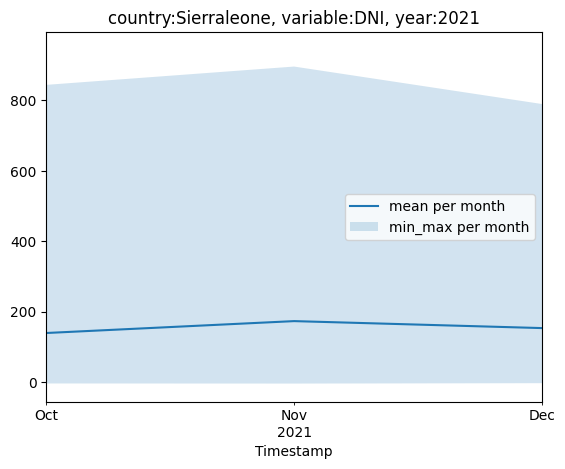

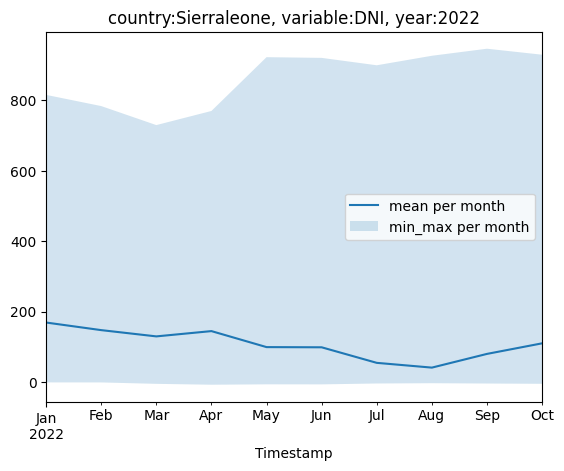

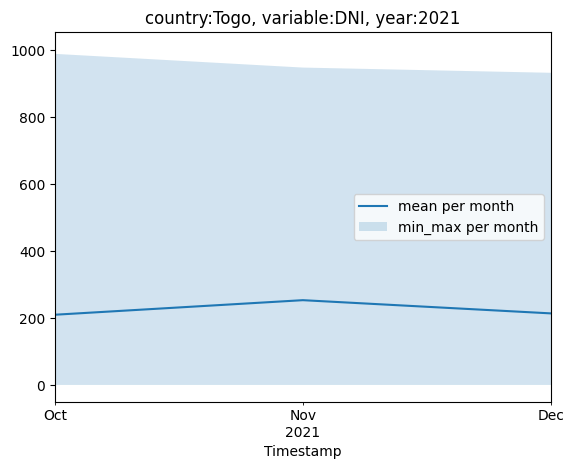

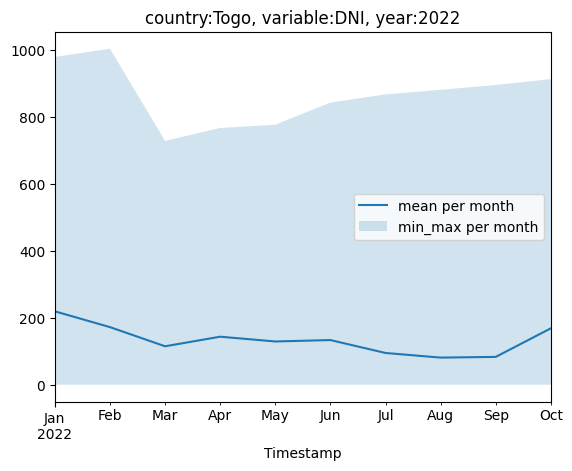

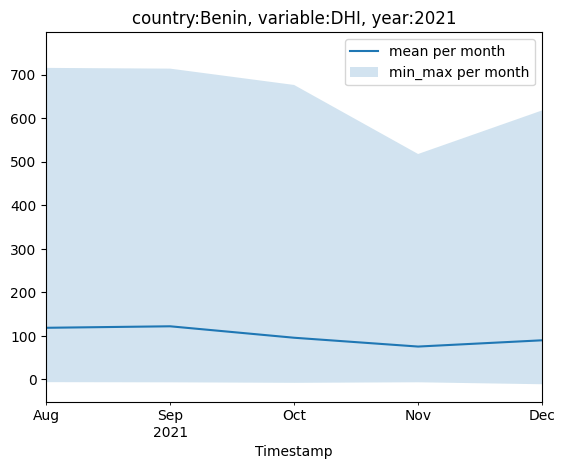

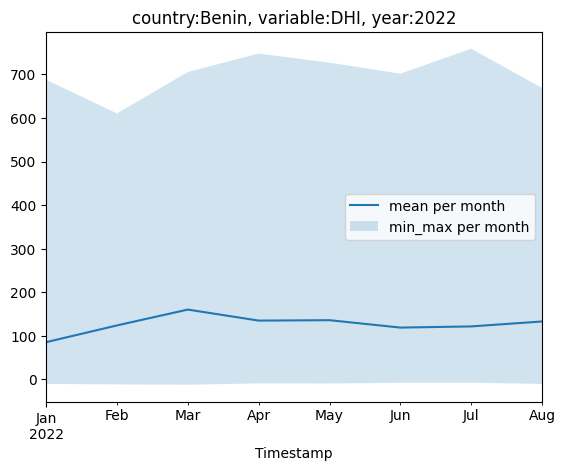

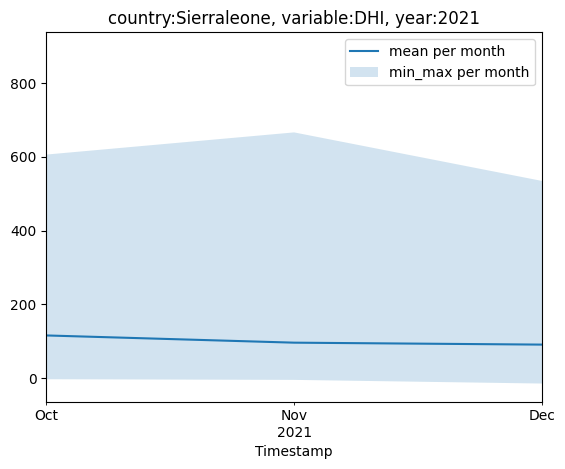

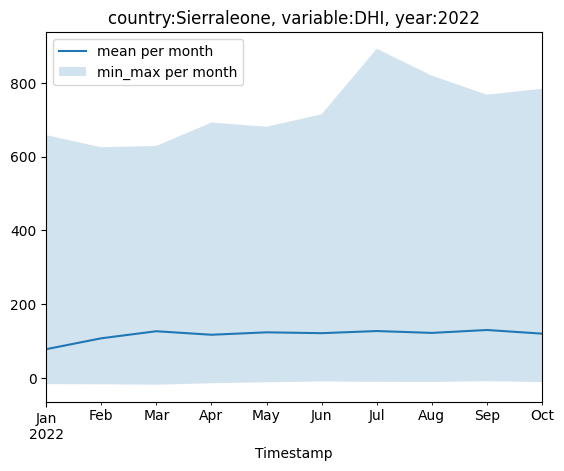

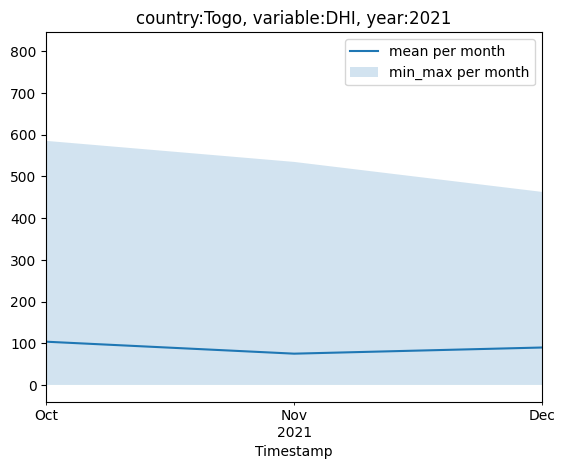

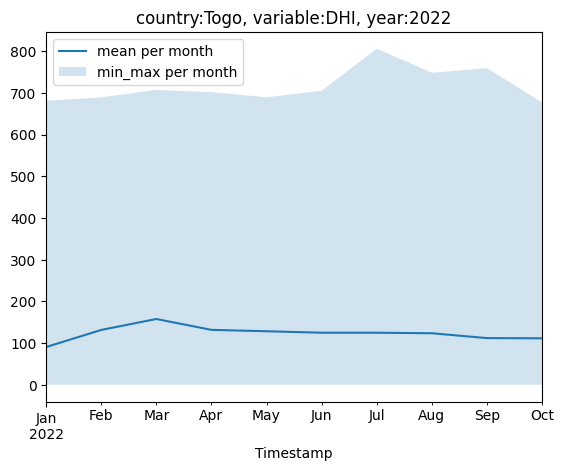

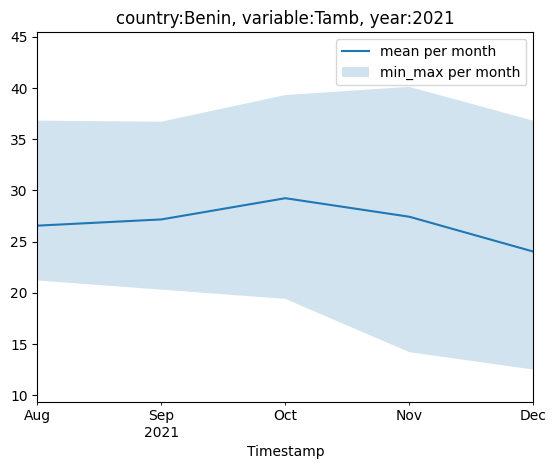

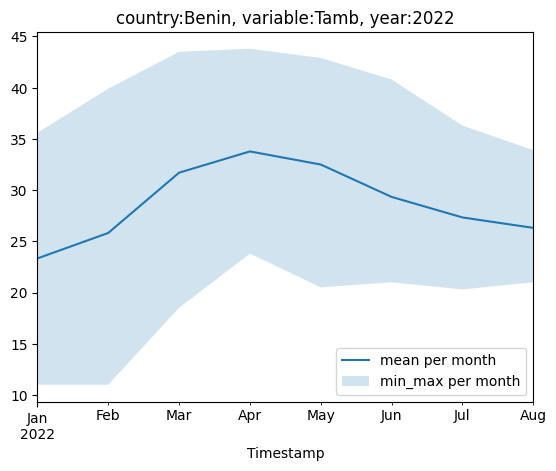

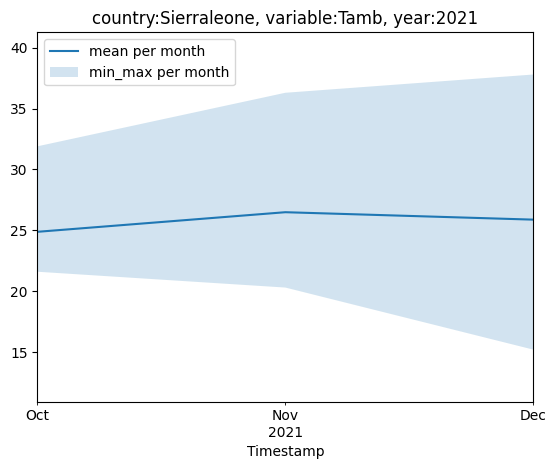

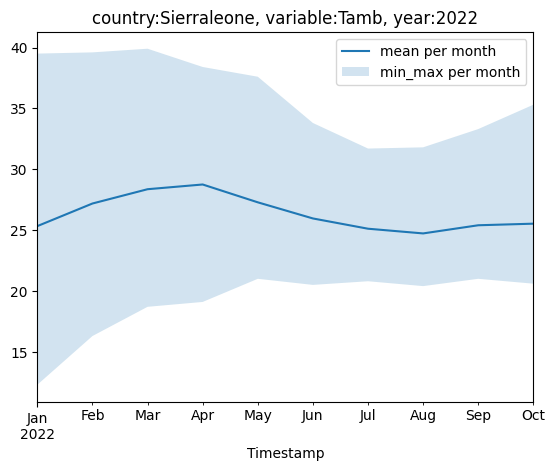

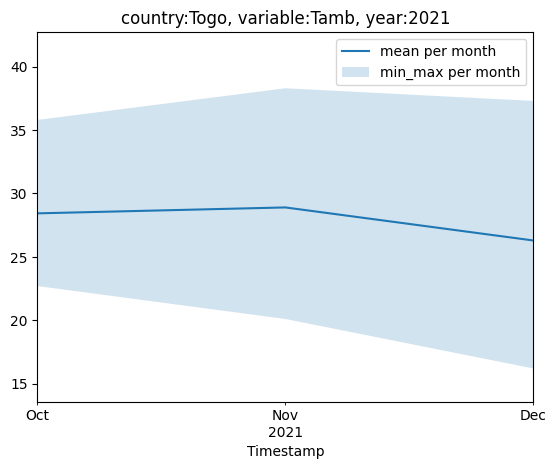

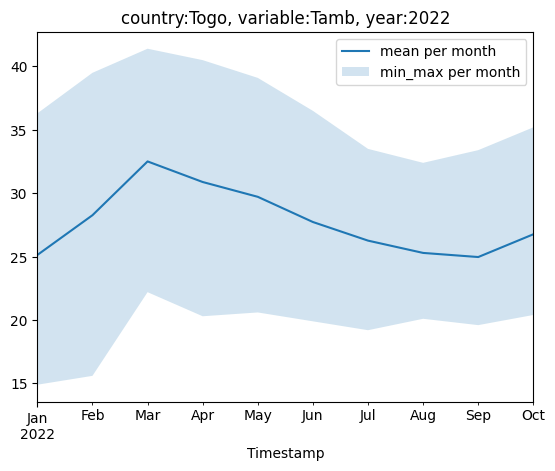

In [14]:
# Time series analysis: Pattern by month
for col in l3:
    for country in l4:
        for yr in l5: 
            trend_viz(df, col, country, 'M', yr)

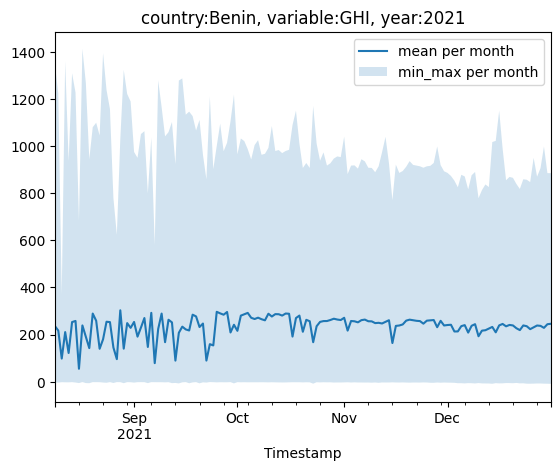

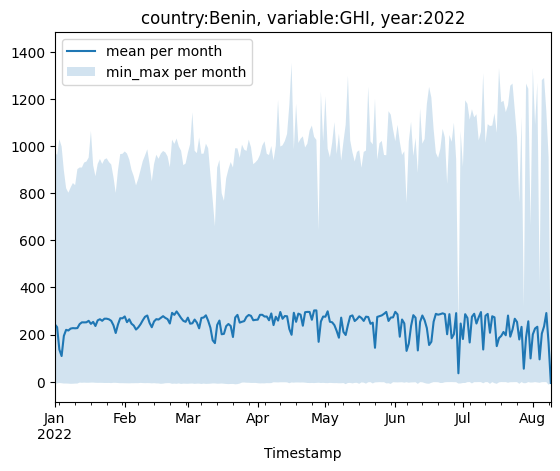

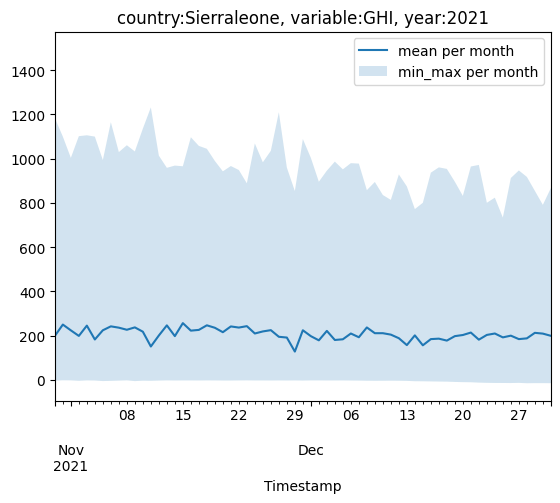

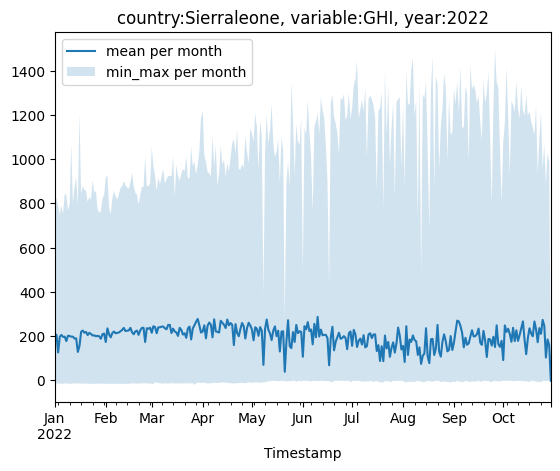

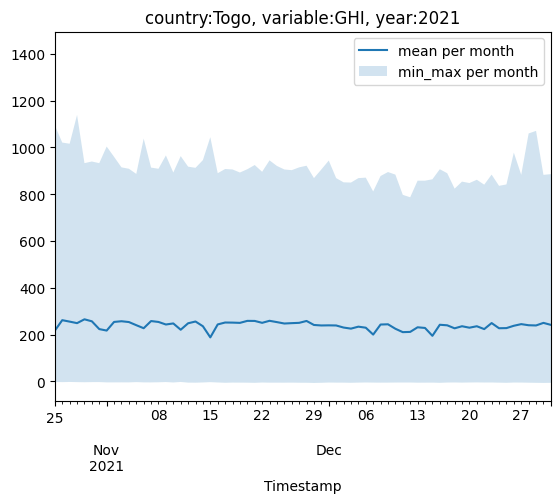

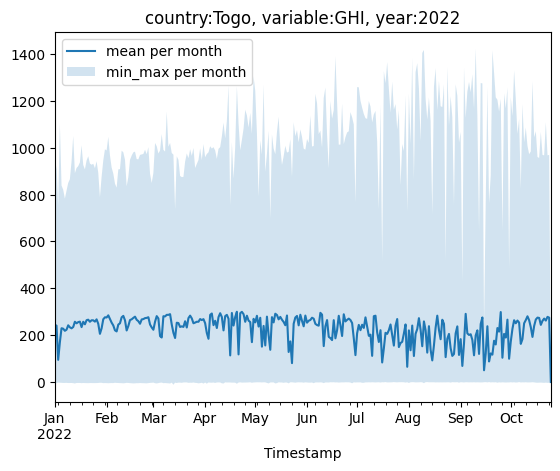

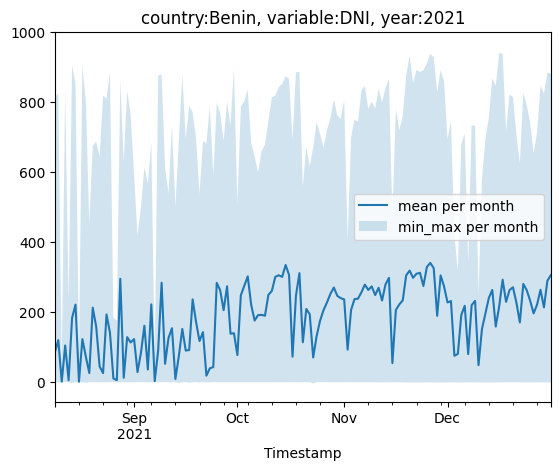

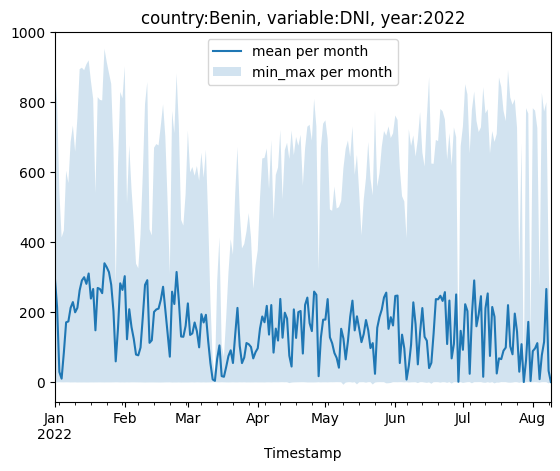

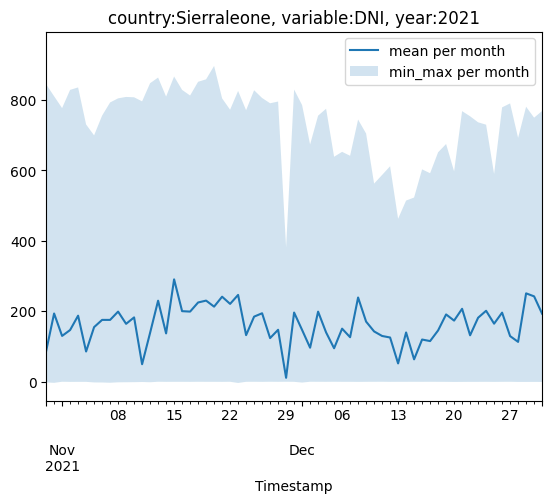

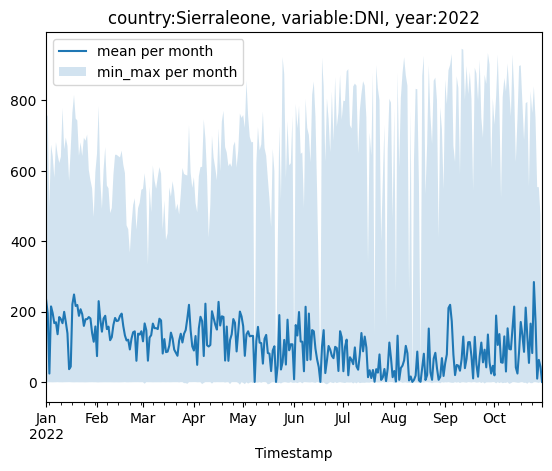

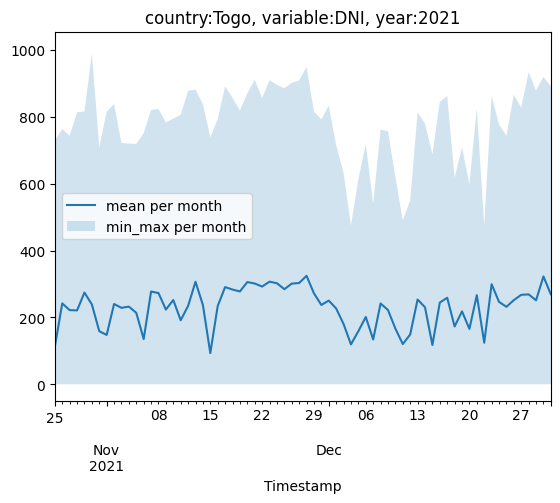

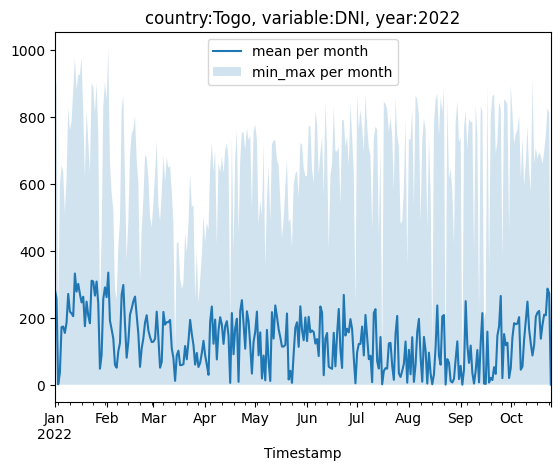

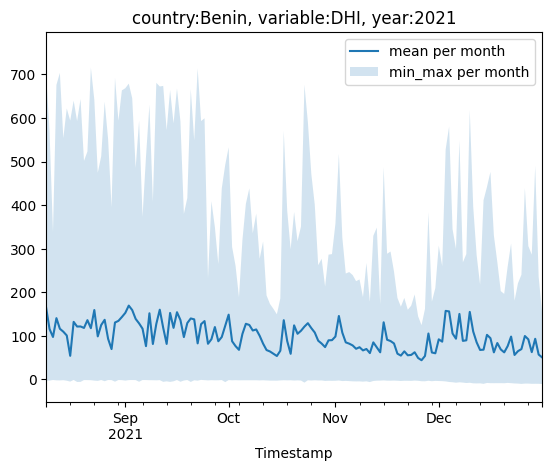

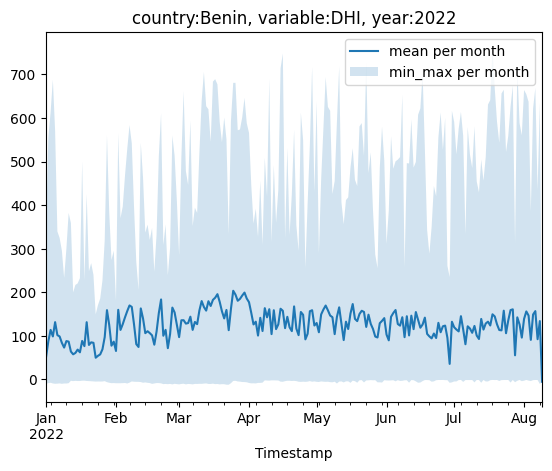

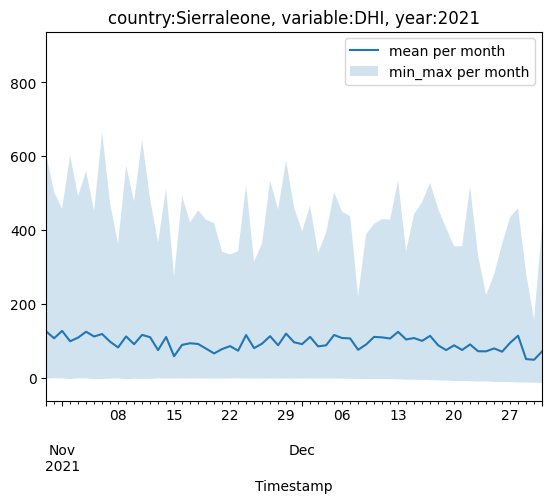

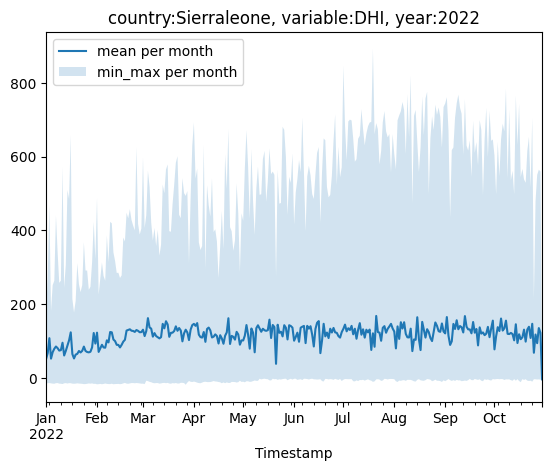

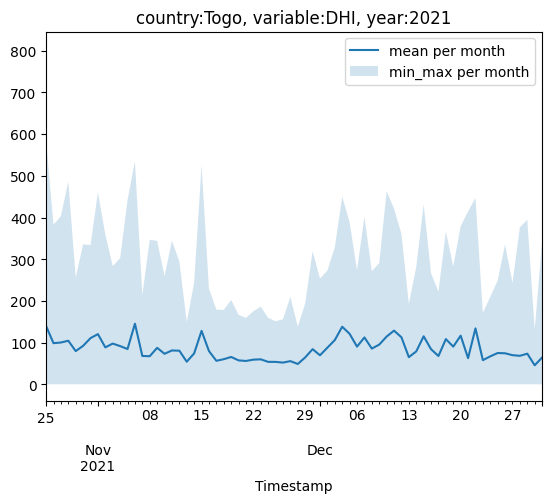

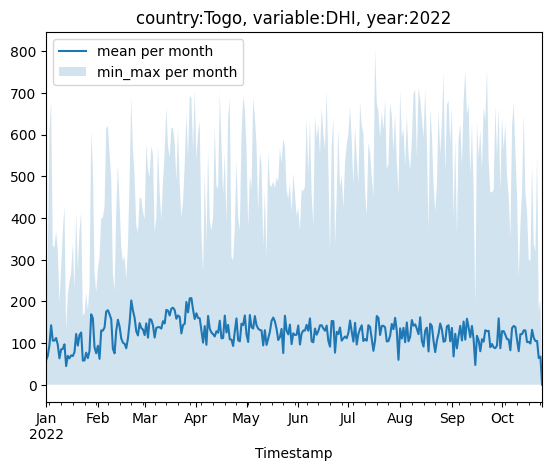

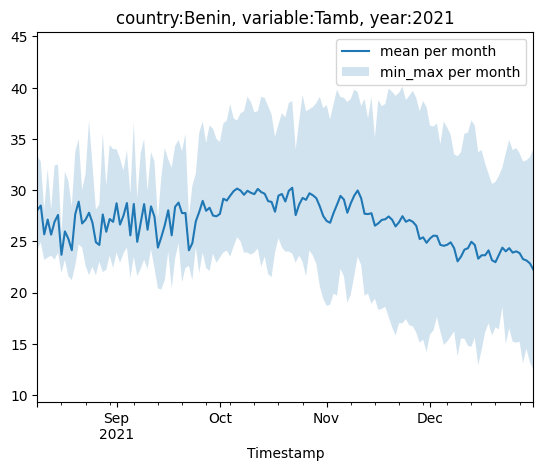

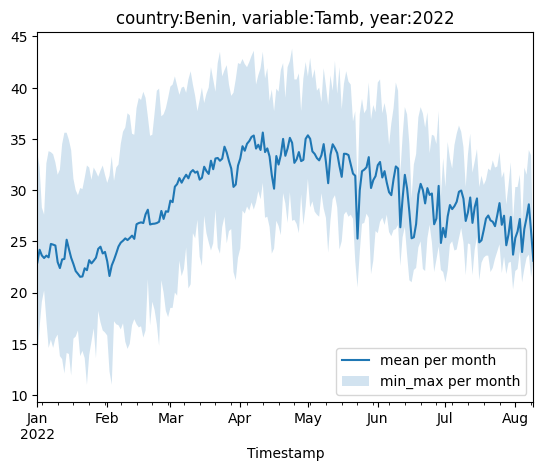

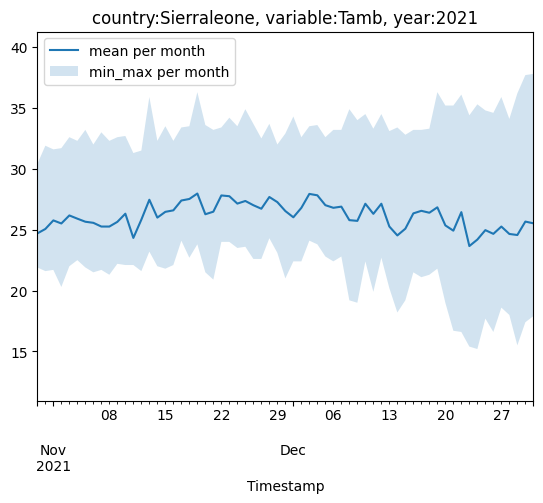

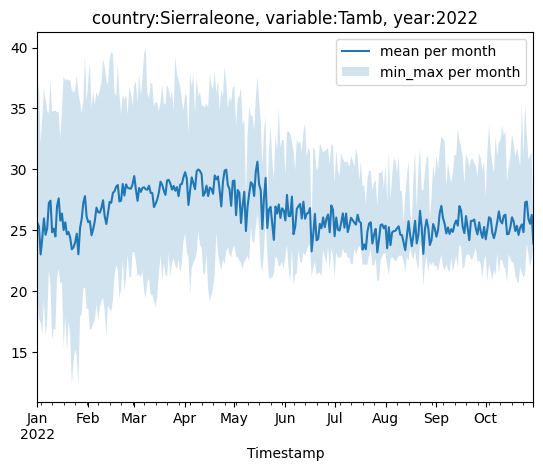

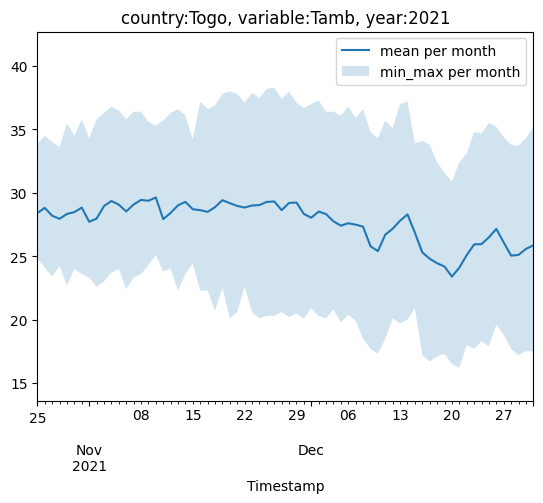

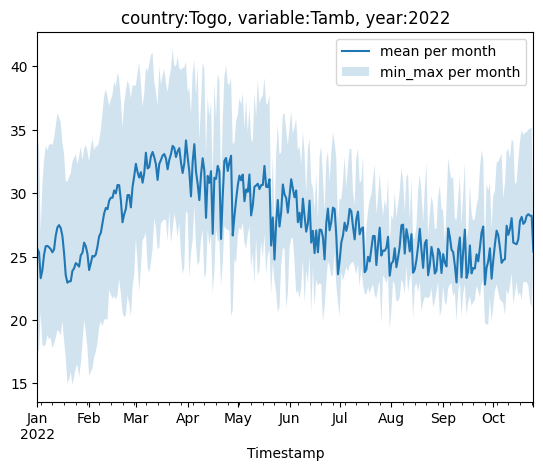

In [15]:
# Time series analysis: Pattern by day
for col in l3:
    for country in l4:
        for yr in l5: 
            trend_viz(df, col, country, 'D', yr)

### Impact of cleaning over sensor readings